# Plot air temperature and relative hudmity for validation
- This script is used to plot air temperature and relative humidity from simulations in comparison with sensor data;
- Simulations: CNTL, TRAF at UK-Manchester. 

In [32]:
import os
import xarray as xr
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cftime
import string
import matplotlib.dates as mdates
home_path = '/gws/nopw/j04/duicv/yuansun/'

In [33]:
df = pd.read_csv('./data_for_figure/UK-Manchester.csv')
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df['year-month'] = df['time'].dt.strftime('%Y-%m')
df.head()

,time,RH2M_obs,TSA_U_obs,TSA_U_cntl,RH2M_cntl,TSA_U_traffic,RH2M_traffic,hour,minute,diurnal,year-month
0,2022-01-01 00:00:00,NaN,NaN,13.507690,87.172380,13.507690,87.17238,0,0,00:00,2022-01
1,2022-01-01 01:00:00,NaN,NaN,13.702209,86.831400,13.743835,86.73969,1,0,01:00,2022-01
2,2022-01-01 02:00:00,NaN,NaN,13.773071,86.172905,13.818451,86.05631,2,0,02:00,2022-01
3,2022-01-01 03:00:00,NaN,NaN,13.429840,84.758060,13.458435,84.68234,3,0,03:00,2022-01
4,2022-01-01 04:00:00,NaN,NaN,13.139038,83.672840,13.165070,83.60714,4,0,04:00,2022-01


In [34]:
var_list = ['TSA_U', 'RH2M']   
linewidth = 0.5
lc0 = '#1b9e77'
#lc1 = '#d95f02'
#lc2 = '#7570b3'
lc1 = '#1f78b4'
lc2 = '#e31a1c'
labelcolor = '#6b6b6b'
#diff_lc = '#b60bc1'
#diff_lc = '#e7298a'
diff_lc = '#1b9e77'
mid_time = [pd.to_datetime('2022-06-01 00:00:00')]
metric = ['Monthly mean', 'Hourly mean']
sequence2 = [r'$T_\mathrm{air}$', 'RH']
labelfont = 6
padding = 4
xwidth = 0.5
pad = 1
handletextpad = 0.5
GRIDNAME = 'UK-Manchester'
length = 2
def rmse(y_true, y_pred):
    return np.sqrt(np.mean((y_true - y_pred) ** 2))
lc = ['black', lc1, lc2]
case_list = ['obs', 'cntl', 'traffic']
label_list = ['Observation', 'CNTL', 'TRAF']
ax_ymin_list = [4, 55]
ax_ymax_list = [20, 95]
ax2_ymax_list = [0.5, 0.4,  0, 0]
ax2_ymin_list = [0.1, 0, -4, -4]
col = 4
row = 1
marker = 'o'
markersize = 1


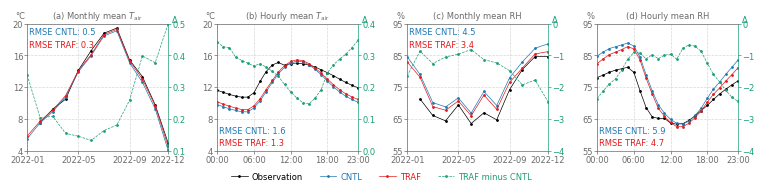

In [35]:
fig, axs = plt.subplots(row, col, figsize=(7.5, 1.75))
ax = axs.flatten()
for i in range(row*col):
    var_index = i // 2
    var_indexed = var_list[var_index]
    ax2 = ax[i].twinx()
    ax_ymin = ax_ymin_list[var_index]
    ax_ymax = ax_ymax_list[var_index]
    ax2_ymin = ax2_ymin_list[i]
    ax2_ymax = ax2_ymax_list[i]
    ax[i].set_ylim([ax_ymin, ax_ymax])
    ax2.set_ylim([ax2_ymin, ax2_ymax])
    ax[i].set_yticks([ax_ymin, ax_ymin + (ax_ymax - ax_ymin)/4, (ax_ymin + ax_ymax)/2, ax_ymax - (ax_ymax - ax_ymin)/4, ax_ymax])
    ax2.set_yticks([ax2_ymin, ax2_ymin + (ax2_ymax - ax2_ymin)/4, (ax2_ymin + ax2_ymax)/2, ax2_ymax - (ax2_ymax - ax2_ymin)/4, ax2_ymax])
    for c, case in enumerate(case_list):
        var = f'{var_indexed}_{case}'
        df_case = df[['diurnal', 'year-month', var]].copy().reset_index()
        #df_case['time'] = pd.to_datetime(df_case['time'], format='%Y-%m-%d %H:%M:%S')
        #df_case.set_index('time', inplace=True)
        df_case_diurnal = df[['diurnal', var]].copy()
        diurnal_mean = df_case_diurnal.groupby('diurnal').mean(numeric_only=True)
        numeric_cols = df_case.columns
        cols = numeric_cols.drop(['diurnal'])
        monthly_mean = df_case[cols].groupby(['year-month']).mean().reset_index()
        if i%2==0:
            ax[i].plot(monthly_mean['year-month'], monthly_mean[var], label=label_list[c], color=lc[c], linewidth=linewidth,
                       marker=marker, markersize=markersize)
            xticks = [monthly_mean['year-month'].iloc[0], monthly_mean['year-month'].iloc[4], monthly_mean['year-month'].iloc[8], monthly_mean['year-month'].iloc[-1]]    
            ax[i].set_xticks(xticks)
            ax[i].set_xlim([monthly_mean['year-month'].iloc[0],  monthly_mean['year-month'].iloc[-1]])
        elif i%2==1: 
            ax[i].plot(diurnal_mean.index, diurnal_mean[var], label=label_list[c], color=lc[c], linewidth=linewidth,
                       marker=marker, markersize=markersize)
            ax[i].set_xticks([diurnal_mean.index[0], '06:00', '12:00', '18:00', diurnal_mean.index[-1]])
            ax[i].set_xlim([diurnal_mean.index[0], diurnal_mean.index[-1]])
        ax[i].set_title(f'({string.ascii_lowercase[i]}) {metric[i%2]} {sequence2[i//2]}',fontsize=labelfont,color=labelcolor, pad = padding)   
        if i in [0, 1]:
            unit = '°C'
        elif i in [2, 3]:
            unit = '%'        
        ax[i].set_ylabel(unit,labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=labelcolor)
        ax[i].yaxis.set_label_coords(-0.05, 1.025)
        ax[i].tick_params(axis='y', which='both', left=True, right=False, labelleft=True, labelcolor=labelcolor, color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
        ax[i].tick_params(axis='x', which='both', top=False, bottom=True, labelbottom=True, labelcolor=labelcolor,color=labelcolor,labelsize=labelfont,pad=pad, width = xwidth, length = length)
        for s, spine in enumerate(ax[i].spines.values()):
            spine.set_linewidth(xwidth)
            spine.set_edgecolor([labelcolor, diff_lc, labelcolor, labelcolor][s])       
        ax[i].grid(True,linestyle='--',linewidth=0.5, alpha=0.5)
    df_cntl = df[f'{var_indexed}_cntl']
    df_traf = df[f'{var_indexed}_traffic']
    delta = pd.DataFrame({var_indexed: df_traf.values - df_cntl.values})
    delta['diurnal'] = df_case_diurnal['diurnal']
    delta['year-month'] = df_case['year-month']
    delta_monthly_mean = delta.groupby('year-month').mean(numeric_only=True)[var_indexed]
    delta_diurnal_mean = delta.groupby('diurnal').mean(numeric_only=True)[var_indexed]
    if i%2==0:
       ax2.plot(monthly_mean['year-month'], delta_monthly_mean.values, label='TRAF minus CNTL', color=diff_lc, linewidth=linewidth, 
                linestyle='--',marker=marker, markersize=markersize)
    elif i%2==1:
       ax2.plot(diurnal_mean.index, delta_diurnal_mean.values, label='TRAF minus CNTL', color=diff_lc, linewidth=linewidth, 
                linestyle='--',marker=marker, markersize=markersize)
    for spin in ax2.spines.values():
        spin.set_visible(False)   
    ax2.tick_params(axis='y', which='both', left=False, right=True, labelleft=False, labelcolor=diff_lc, color=diff_lc,labelsize=labelfont,pad=pad, width = xwidth, length = length)
    ax2.tick_params(axis='x', which='both', top=False, bottom=False, labelbottom=False)   
    ax2.set_ylabel(r'$\Delta$',labelpad=5, rotation=0, ha='center', fontsize=labelfont,color=diff_lc)
    ax2.yaxis.set_label_coords(1.05, 1.085)   
    if i in [0, 2]:
        yloc = 0.9
    else:
        yloc = 0.125   
    if i%2==0:
        df_var = df[['year-month', f'{var_indexed}_obs', f'{var_indexed}_cntl', f'{var_indexed}_traffic']].copy()
        #df_var = df_var.set_index('time')
        diff_month_mean = df_var.groupby('year-month').mean(numeric_only=True)
        diff_traf = rmse(diff_month_mean[f'{var_indexed}_traffic'], diff_month_mean[f'{var_indexed}_obs'])
        diff_cntl = rmse(diff_month_mean[f'{var_indexed}_cntl'], diff_month_mean[f'{var_indexed}_obs'])
        ax[i].text(0.01,yloc,'RMSE CNTL: {:.1f}'.format(diff_cntl.item()), fontsize=labelfont, color=lc[1], horizontalalignment='left', verticalalignment='bottom', transform=ax[i].transAxes)
        ax[i].text(0.01,yloc-0.1,'RMSE TRAF: {:.1f}'.format(diff_traf.item()), fontsize=labelfont, color=lc[2], horizontalalignment='left', verticalalignment='bottom', transform=ax[i].transAxes) 
    elif i%2==1:
        df_var = df[['diurnal', f'{var_indexed}_obs', f'{var_indexed}_cntl', f'{var_indexed}_traffic']].copy()
        diff_diurnal_mean = df_var.groupby('diurnal').mean(numeric_only=True)
        diff_traf = rmse(diff_diurnal_mean[f'{var_indexed}_traffic'], diff_diurnal_mean[f'{var_indexed}_obs'])
        diff_cntl = rmse(diff_diurnal_mean[f'{var_indexed}_cntl'], diff_diurnal_mean[f'{var_indexed}_obs'])
        ax[i].text(0.01,yloc,'RMSE CNTL: {:.1f}'.format(diff_cntl.item()), fontsize=labelfont, color=lc[1], horizontalalignment='left', verticalalignment='bottom', transform=ax[i].transAxes)
        ax[i].text(0.01,yloc-0.1,'RMSE TRAF: {:.1f}'.format(diff_traf.item()), fontsize=labelfont, color=lc[2], horizontalalignment='left', verticalalignment='bottom', transform=ax[i].transAxes)
plt.subplots_adjust(left=0.0275, right=0.975, bottom=0.2, top=0.925, wspace=0.35, hspace= 0.35)
lines1, labels1 = ax[0].get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
lines = lines1 + lines2
labels = labels1 + labels2
legend = fig.legend(lines, labels, bbox_to_anchor=(0.5, -0.015), loc='lower center', frameon=False, 
                        handletextpad=handletextpad, fontsize=labelfont, ncol=8)
for i, text in enumerate(legend.get_texts()):
    text.set_color((lc + [diff_lc])[i])
#plt.suptitle('Timeseries and diurnal plots for ' + GRIDNAME, fontsize=labelfont+2, color=labelcolor,x=0.5, y=0.99, ha='center', va='top')
fig.savefig(f'{GRIDNAME}.png', dpi=300)    
fig.savefig(f'{GRIDNAME}.pdf', dpi=600)

# Description

In [15]:
df = pd.read_csv('./data_for_figure/UK-Manchester.csv')
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d %H:%M:%S')
df['date'] = df['time'].dt.date
#df.set_index('time', inplace=True)
df['TSA_U_diff'] = df['TSA_U_traffic'] - df['TSA_U_cntl']
print(df['TSA_U_diff'].max(), df['TSA_U_diff'].idxmax())

2.832335999999999 8446


In [17]:
df_mean = df[['date', 'TSA_U_diff']].copy()
df_mean = df_mean.groupby('date').mean()
print(df_mean.min(), df_mean.max())

TSA_U_diff    0.059312
dtype: float64 TSA_U_diff    1.063094
dtype: float64
